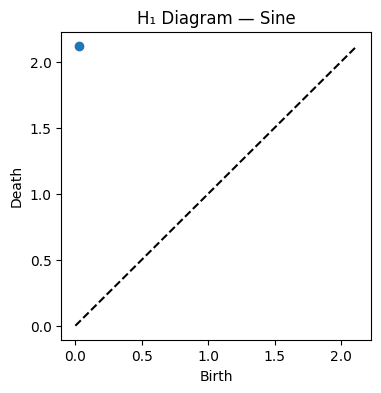

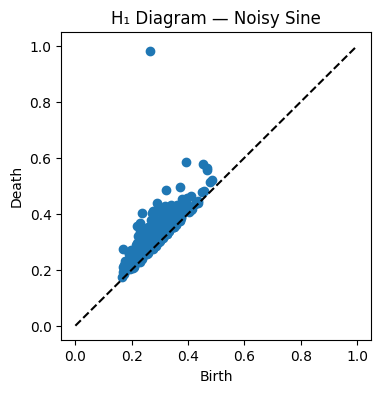

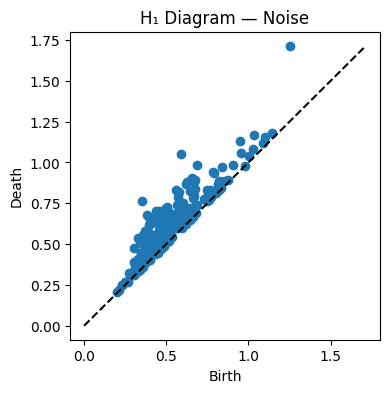

In [1]:
import sys
from pathlib import Path
PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT / "src"))

import numpy as np
import matplotlib.pyplot as plt
from cycle_tda.embeddings import delay_embedding
from cycle_tda.ph import compute_diagrams

# Signals
t = np.linspace(0, 20*np.pi, 600)
signals = {
    "Sine": np.sin(t),
    "Noisy Sine": np.sin(t) + 0.3*np.random.randn(len(t)),
    "Noise": np.random.randn(len(t)),
}

m, tau = 3, 10

for name, y in signals.items():
    X = delay_embedding(y, m, tau)
    dgms = compute_diagrams(X)

    plt.figure(figsize=(4,4))
    dgm = dgms[1]
    if len(dgm) > 0:
        plt.scatter(dgm[:,0], dgm[:,1])
        lim = max(dgm.max(), 1)
        plt.plot([0,lim],[0,lim],'k--')
    plt.title(f"H₁ Diagram — {name}")
    plt.xlabel("Birth")
    plt.ylabel("Death")
    plt.show()

